#### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

#### Data

In [2]:
df_red = pd.read_csv('winequality-red.csv', delimiter=';')

In [3]:
df_red['color'] = 'red'

In [4]:
df_white = pd.read_csv('winequality-white.csv', delimiter=';')

In [5]:
df_white['color'] = 'white'

In [6]:
df = pd.concat([df_red, df_white])

In [7]:
df.drop('quality', axis=1, inplace=True)

#### Correlation

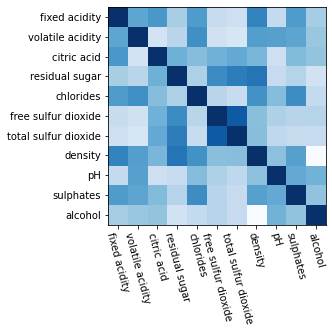

In [8]:
plt.imshow(df.corr(), cmap='Blues')
plt.xticks(np.arange(len(df.corr().index.values)), df.corr().index.values, rotation=-75)
plt.yticks(np.arange(len(df.corr().index.values)), df.corr().index.values);

In [9]:
correlations = df.corr().abs().unstack().sort_values(ascending=False)

In [10]:
correlations[11:17]

total sulfur dioxide  free sulfur dioxide     0.720934
free sulfur dioxide   total sulfur dioxide    0.720934
alcohol               density                 0.686745
density               alcohol                 0.686745
                      residual sugar          0.552517
residual sugar        density                 0.552517
dtype: float64

#### Distribution

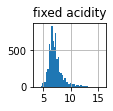

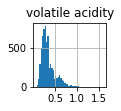

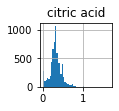

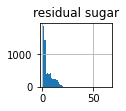

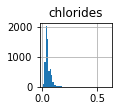

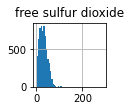

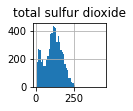

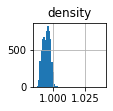

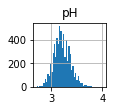

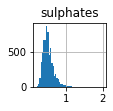

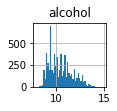

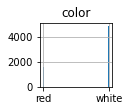

In [11]:
j = 1
for i in df.columns.values:
    ax=plt.figure().add_subplot(3, 4, j)
    df[i].hist(bins=50)
    ax.set_title(i)
    j += 1

In [12]:
df_X = df.iloc[:, df.columns != 'color']

#### Standardization

In [13]:
scaler = StandardScaler()
df_X_scaled = pd.DataFrame(scaler.fit_transform(df_X))

#### Normalization

In [14]:
df_X_norm = pd.DataFrame(preprocessing.normalize(df_X_scaled))

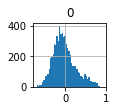

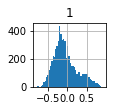

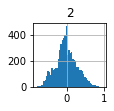

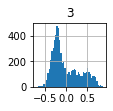

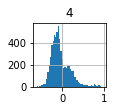

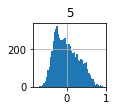

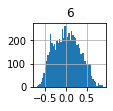

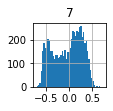

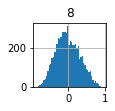

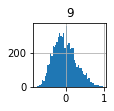

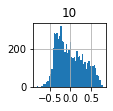

In [15]:
j = 1
for i in df_X_norm.columns.values:
    ax=plt.figure().add_subplot(3, 4, j)
    df_X_norm[i].hist(bins=50)
    ax.set_title(i)
    j += 1

#### PCA

In [16]:
pca = PCA(n_components=df_X_norm.shape[1], random_state=51)
pca.fit(df_X_norm)
df_X_pca = pca.transform(df_X_norm)

In [17]:
for i in range(df_X_norm.shape[1]):
    print(pca.explained_variance_ratio_[0 : i + 1].sum() * 100)

25.850314659072033
48.66400503472406
61.64882243179388
71.24292621803698
78.41949840511863
84.96923339365772
90.23811236573381
93.99572938226473
97.40129888740813
99.6902501887055
99.99999999999999


In [18]:
pca.components_[0]

array([-0.07120625, -0.21814858,  0.13811252,  0.487514  , -0.07204871,
        0.41934763,  0.48294736,  0.27520928, -0.23165558, -0.1620275 ,
       -0.34735706])

In [19]:
df_X.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype=object)

In [20]:
pca_3d = PCA(n_components=3, random_state=51)
pca_3d.fit(df_X_norm)
pca_spl_3d = pca_3d.transform(df_X_norm)

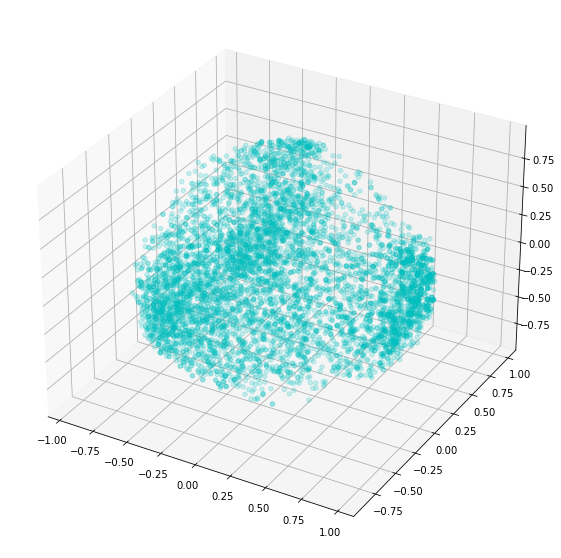

In [38]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(pca_spl_3d[:, 0], pca_spl_3d[:, 1], pca_spl_3d[:, 2], alpha=0.2, color='c');

#### Silhouette

In [22]:
k = 10
S = []
for i in range(2, k + 1):
    cluster = GaussianMixture(n_components=i, random_state=51, n_init=5)
    cluster.fit(df_X_norm)
    predicted = cluster.predict(df_X_norm)
    s = silhouette_score(df_X_norm, predicted)
    S.append(s)

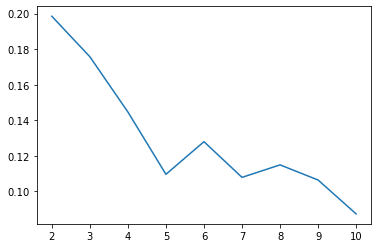

In [23]:
S = pd.Series(S, index=range(2, k + 1))
plt.plot(S.index.values, S);

#### Clusters

In [24]:
cluster = GaussianMixture(n_components=2, random_state=51, n_init=5)
cluster.fit(df_X_norm)
predicted = cluster.predict(df_X_norm)

In [25]:
pca_3d_clust = np.append(pca_spl_3d, predicted.reshape(-1, 1), axis=1)
pca_3d_clust = np.append(pca_3d_clust, np.asarray(df['color']).reshape(-1, 1), axis=1)

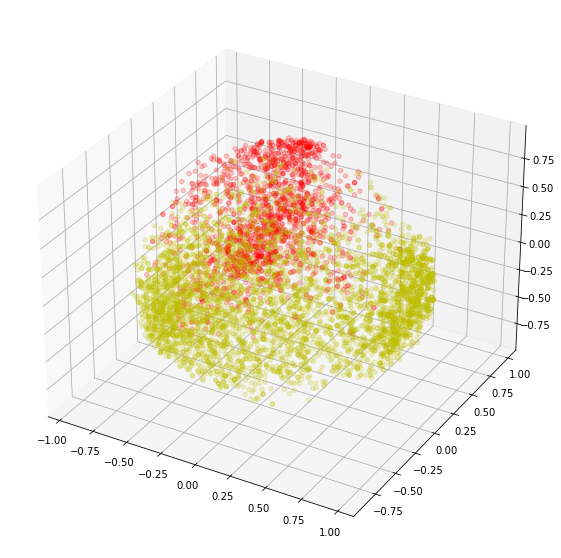

In [42]:
fig2 = plt.figure(figsize=(10, 10))
ax2 = fig2.add_subplot(projection='3d')
mapping = {0:'y', 1:'r'}
colors = [mapping[x] for x in predicted]
ax2.scatter(pca_3d_clust[:, 0], pca_3d_clust[:, 1], pca_3d_clust[:, 2], alpha=0.2, color=colors);

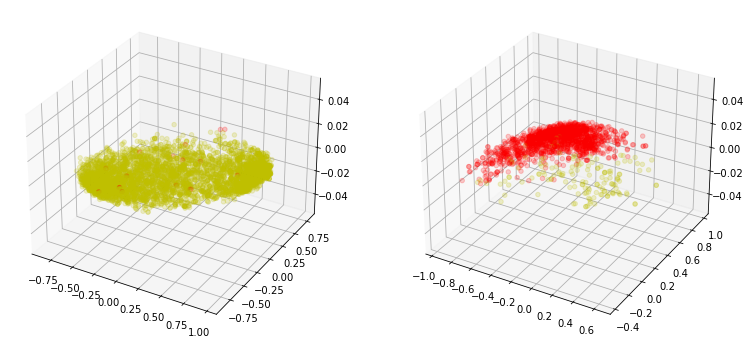

In [43]:
fig3 = plt.figure(figsize=(20, 20))
for i in range(2):
    ax3 = fig3.add_subplot(1, 3, i + 1, projection='3d')
    sub_clust= pca_3d_clust[pca_3d_clust[:, 3] == i]
    type_colors = np.where(sub_clust[:, 4] == 'red', 'r', 'y')
    ax3.scatter(sub_clust[:, 0], sub_clust[:, 1], alpha=0.2, color = type_colors)